## ARIMA

### Modelos AR & MA 
En las series temporales, los modelos de autorregresión (AR) y de media móvil (MA) proporcionan una descripción sencilla de un proceso en términos de dos factores: uno para la autorregresión y otro para la media móvil. La parte AR implica la regresión de la variable sobre sus propios valores retardados. La idea es que el valor del periodo anterior puede ayudarnos a predecir el valor del periodo actual. La parte MA consiste en modelizar el término de error como una combinación lineal de términos de error que se producen en el mismo paso temporal y en distintos momentos del pasado.

### Modelos Autorregresivos
Se habla de modelo autorregresivo (AR) cuando se puede predecir el valor actual de una serie temporal a partir de valores anteriores de la misma serie. Es una regresión que utiliza su misma serie, aunque desplazada un paso de tiempo, llamado desfase. El valor actual es una media ponderada de sus valores anteriores. Tanto *t-1* como *t-2* son retardos de la serie temporal $y$. El término de error (ruido) se representa como $e$. Los valores $a_{1}$ y $a_{2}$ son los coeficientes del modelo.

Modelo AR(1): $y_{t}$ = $a_{1}$ $y_{t-1}$ + $e_{t}$

Modelo AR(2): $y_{t}$ = $a_{1}$ $y_{t-1}$ + $a_{2}$ $y_{t-2}$ + $e_{t}$

Representamos el orden del modelo con la letra $p$ en los modelos AR, AR($p$).

### Modelos de Medias Móviles
La media móvil (MA) es un proceso en el que el valor actual de una serie temporal, $y$, se define como una combinación lineal de errores pasados. El término de error (ruido) se representa como $e$. Tanto t-1 como t-2 son retardos temporales de los errores.

Modelo MA(1): $y_{t}$ = $m_{1}$ $e_{t-1}$ + $e_{t}$

Modelo MA(2): $y_{t}$ = $m_{1}$ $e_{t-1}$ + $m_{2}$ $e_{t-2}$ + $e_{t}$

Representamos el orden del modelo con la letra $q$ en los modelos MA, MA($q$).

### Modelos ARMA
We can combine both Autoregressive and Moving Average models together to create an ARMA model. The time series is regressed on the previous values and the previous errors.

Podemos combinar ambos modelos, el modelo autorregresivo y el de media móvil, para crear un modelo ARMA. Se realiza una regresión de la serie temporal sobre los valores anteriores y los errores anteriores.

Modelo ARMA(1,1): $y_{t}$ = $a_{1}$ $y_{t-1}$ + $m_{1}$ $e_{t-1}$

Para ARMA($p$, $q$), p es el orden del modelo AR y $q$ es el orden del modelo MA.

## Métricas de calidad de las predicciones

Antes de empezar a hacer predicciones, veamos cómo medir la calidad de nuestras predicciones y echemos un vistazo a las métricas más utilizadas.

- [R squared](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination): coeficiente de determinación (en econometría, puede interpretarse como el porcentaje de varianza explicado por el modelo), $(-1, 1]$

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ 

```python
sklearn.metrics.r2_score
```
---
- [Mean Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error): se trata de una métrica interpretable porque tiene la misma unidad de medida que la serie inicial, $[0, +\infty)$

$MAE = \frac{\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|}{n}$ 

```python
sklearn.metrics.mean_absolute_error
```
---
- [Median Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error): de nuevo, una métrica interpretable que es especialmente interesante porque es robusta a los valores atípicos, $[0, +\infty)$

$MedAE = median(|y_1 - \hat{y}_1|, ... , |y_n - \hat{y}_n|)$

```python
sklearn.metrics.median_absolute_error
```
---
- [Mean Squared Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): la métrica más utilizada que penaliza más los errores grandes y viceversa, $[0, +\infty)$

$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

```python
sklearn.metrics.mean_squared_error
```
---
- [Mean Squared Logarithmic Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error): prácticamente, es lo mismo que el MSE, pero tomamos el logaritmo de la serie. Como resultado, también damos más peso a los errores pequeños. Se suele utilizar cuando los datos tienen tendencias exponenciales, $[0, +\infty)$

$MSLE = \frac{1}{n}\sum\limits_{i=1}^{n} (log(1+y_i) - log(1+\hat{y}_i))^2$

```python
sklearn.metrics.mean_squared_log_error
```
---
- [Mean Absolute Percentage Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html): Es lo mismo que el MAE, pero se calcula en porcentaje, lo que resulta muy práctico cuando se quiere explicar la calidad del modelo al equipo directivo, $[0, +\infty)$

$MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}$ 

```python
sklearn.metrics.mean_absolute_percentage_error
```

### Analítica
Vamos a utilizar los datos de ventas de Johnson&Johnson

In [1]:
# librerias
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/jj.csv', index_col=0)
print(len(data))
data.head()

84


,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


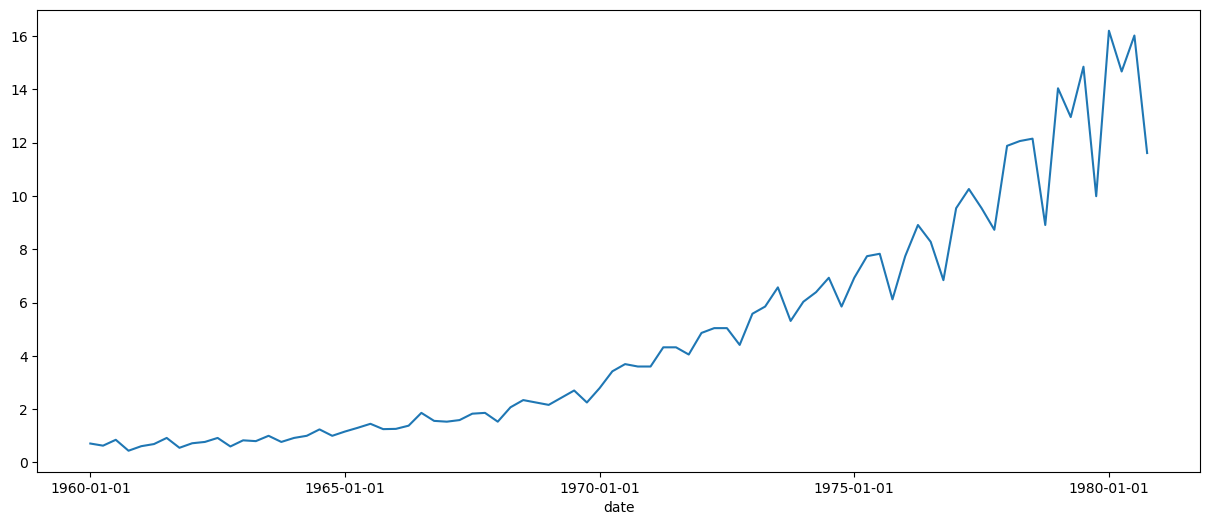

In [3]:
data['data'].plot(figsize=(15,6));

Se aprecia en la gráfica que presenta diferentes estadísticos a lo largo del tiempo.

Representamos su gráfica de autocorrelación. Vemos que tenemos muy complicado determinar el orden p y q, de cara al modelo ARIMA.

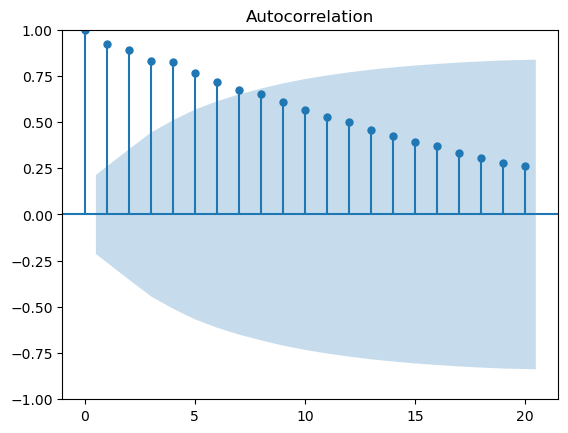

In [4]:
plot_acf(data['data']);

Dividimos en *train* y *test*

In [5]:
X = data['data'].values
train = X[:70]
test = X[70:]

In [6]:
len(X)

84

In [7]:
test

array([ 9.54    ,  8.729999, 11.88    , 12.06    , 12.15    ,  8.91    ,
       14.04    , 12.96    , 14.85    ,  9.99    , 16.2     , 14.67    ,
       16.02    , 11.61    ])

In [8]:
len(test)

14

In [9]:
train

array([ 0.71,  0.63,  0.85,  0.44,  0.61,  0.69,  0.92,  0.55,  0.72,
        0.77,  0.92,  0.6 ,  0.83,  0.8 ,  1.  ,  0.77,  0.92,  1.  ,
        1.24,  1.  ,  1.16,  1.3 ,  1.45,  1.25,  1.26,  1.38,  1.86,
        1.56,  1.53,  1.59,  1.83,  1.86,  1.53,  2.07,  2.34,  2.25,
        2.16,  2.43,  2.7 ,  2.25,  2.79,  3.42,  3.69,  3.6 ,  3.6 ,
        4.32,  4.32,  4.05,  4.86,  5.04,  5.04,  4.41,  5.58,  5.85,
        6.57,  5.31,  6.03,  6.39,  6.93,  5.85,  6.93,  7.74,  7.83,
        6.12,  7.74,  8.91,  8.28,  6.84,  9.54, 10.26])

## Autorregresivo
Tendremos que encontrar el orden de autoregression que mejor encaje con nuestros datos.

In [10]:
model_ar = ARIMA(order=(1,0,0)) # AR(1)
model_ar.fit(train)

ARIMA(order=(1, 0, 0))

In [11]:
test

array([ 9.54    ,  8.729999, 11.88    , 12.06    , 12.15    ,  8.91    ,
       14.04    , 12.96    , 14.85    ,  9.99    , 16.2     , 14.67    ,
       16.02    , 11.61    ])

In [12]:
predictions = model_ar.predict(14)
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

root_mean_squared_error: 3.701190813889492


In [13]:
predictions

array([10.18960874, 10.12012387, 10.05153371,  9.98382676,  9.91699163,
        9.8510171 ,  9.78589208,  9.72160565,  9.65814699,  9.59550546,
        9.53367053,  9.47263181,  9.41237906,  9.35290214])

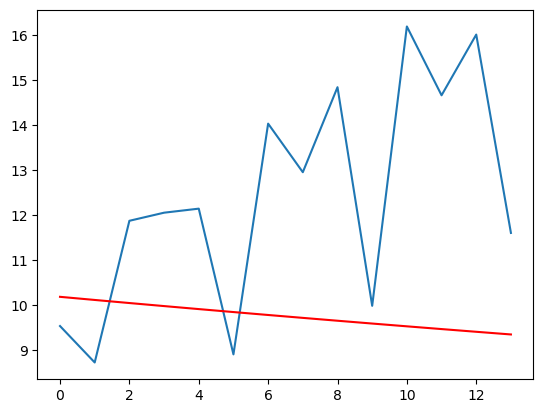

In [14]:
plt.plot(test)
plt.plot(predictions,color='red');

No parece que de buen resultado el AR(1,0,0). Probemos diferentes *lags*, a ver cuál sería el mejor

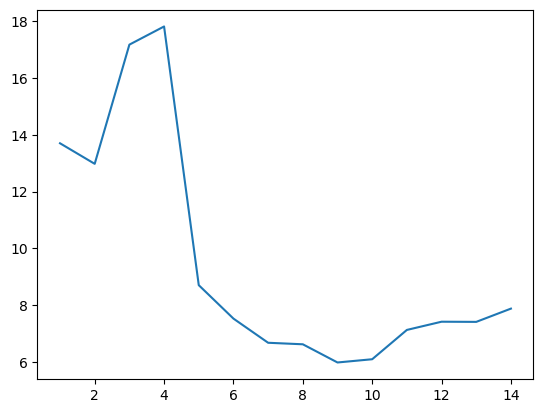

In [15]:
lags = []
mse = []
for lag in range(1, 15):
    try:
        model_ar = ARIMA(order=(lag, 0, 0))
        model_ar.fit(train)
        lags.append(lag)
        predictions = model_ar.predict(14)
        mse.append(mean_squared_error(test, predictions))
    except:
        continue
    
plt.plot(lags, mse);

Un parámetro p>5 parece que da buen resultado, pero aun asi es muy alto el error.

## Medias Móviles
En este caso tendremos en cuenta los errores. El problema es que si tenemos muchos errores al principio, los iremos arrastrando durante las predicciones.

In [16]:
model_ma = ARIMA(order = (0,0,1)) # MA(1)
model_ma.fit(train)

ARIMA(order=(0, 0, 1))

In [17]:
predictions = model_ma.predict(14)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 87.1567910244581


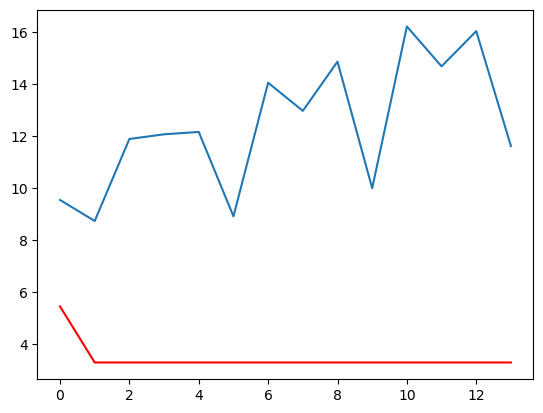

In [18]:
plt.plot(test)
plt.plot(predictions,color='red');

No está dando buen resultado. Probaremos entonces varios *lags*.

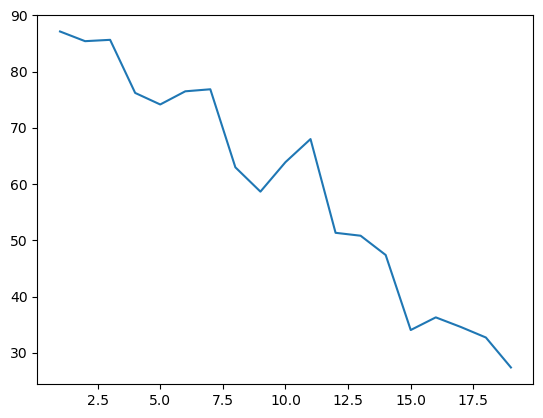

In [19]:
lags = []
mse = []
for lag in range(1, 20):
    try:
        model_ar = ARIMA(order=(0, 0, lag))
        model_ar_fit = model_ar.fit(train)
        predictions = model_ar_fit.predict(14)
        lags.append(lag)
        mse.append(mean_squared_error(test, predictions))
    except:
        continue
    
plt.plot(lags, mse);

Parece que según vamos aumentando el parámetro `q` del modelo *Moving Average*, va disminuyendo el error, pero aun así es bastante grande.

## ARIMA
En el arima no solo influyen los parámetros `p` y `q`, sino que también tendremos en cuenta `d`. Parametro con el que diferenciaremos la serie y conseguiremos que sea estacionaria.

Ahora bien, ¿cuál es la mejor combinación de parámetros? Tendremos que realizar varias pruebas. Para comparar los modelos se suele utilizar el *AIC*.

### *AIC*
*Akaike’s Information Criterion*

$$AIC = -2\log(L) + 2k$$


$k$ es el número de parámetros del modelo estadístico y $L$ es el máximo valor de la función de verosimilitud para el modelo estimado. La función de verosimilitud permite realizar inferencias a partir de un conjunto de observaciones.

Se utiliza para seleccionar el mejor modelo, que será el que tiene menor *AIC*. El *AIC* depende mucho de cada dato, y es una medida de comparación entre modelos, no de presentación de resultados. Un *AIC* bajo no quiere decir que el modelo sea muy bueno. Por tanto, *AIC* no nos dice nada sobre la calidad del modelo en terminos absolutos.


![imagen](./img/aic.png)

#### ¿Cómo conseguir los mejores `p`, `d`, `q`?

In [20]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq[:10]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4)]

In [21]:
len(pdq)

125

In [22]:
results = []
for param in pdq:
    try:
        model_arima = ARIMA(order=param)
        model_arima_fit = model_arima.fit(train)
        results.append((param,model_arima_fit.aic()))
    except:
        continue
    

In [23]:
resultados_df = pd.DataFrame(results, columns=['ARIMA params', 'AIC']).sort_values('AIC')
resultados_df.head()

,ARIMA params,AIC
87,"(3, 2, 2)",37.031462
88,"(3, 2, 3)",38.295490
111,"(4, 2, 1)",38.621254
112,"(4, 2, 2)",38.674096
89,"(3, 2, 4)",40.512472


In [24]:
len(resultados_df)

124

Ya tenemos la mejor combinación de parámetros para el ARIMA. Probemos el modelo.

In [25]:
best_model = ARIMA(order=(3,2,2))
best_model.fit(train)

ARIMA(order=(3, 2, 2))

In [26]:
predictions = best_model.predict(14)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 3.9430750393463803


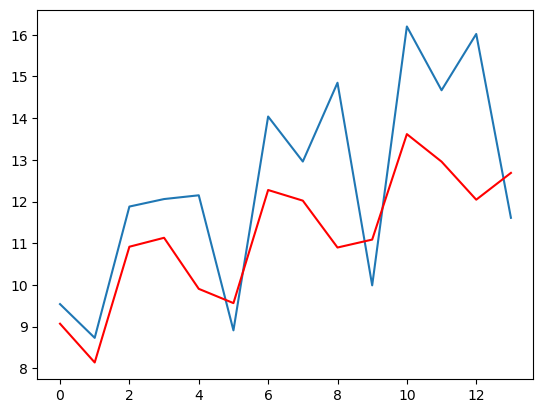

In [27]:
plt.plot(test)
plt.plot(predictions,color='red');

### Auto ARIMA

In [28]:
train

array([ 0.71,  0.63,  0.85,  0.44,  0.61,  0.69,  0.92,  0.55,  0.72,
        0.77,  0.92,  0.6 ,  0.83,  0.8 ,  1.  ,  0.77,  0.92,  1.  ,
        1.24,  1.  ,  1.16,  1.3 ,  1.45,  1.25,  1.26,  1.38,  1.86,
        1.56,  1.53,  1.59,  1.83,  1.86,  1.53,  2.07,  2.34,  2.25,
        2.16,  2.43,  2.7 ,  2.25,  2.79,  3.42,  3.69,  3.6 ,  3.6 ,
        4.32,  4.32,  4.05,  4.86,  5.04,  5.04,  4.41,  5.58,  5.85,
        6.57,  5.31,  6.03,  6.39,  6.93,  5.85,  6.93,  7.74,  7.83,
        6.12,  7.74,  8.91,  8.28,  6.84,  9.54, 10.26])

In [29]:
model = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=138.619, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=196.672, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=180.443, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=140.942, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=113.935, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=166.323, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=47.310, Time=0.14 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=44.000, Time=0.33 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=43.451, Time=0.31 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=51.018, Time=0.26 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=40.763, Time=0.42 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=44.618, Time=0.37 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=42.745, Time=0.49 s

In [30]:
model

ARIMA(order=(3, 2, 2), scoring_args={}, suppress_warnings=True)

In [31]:
model = ARIMA(order=(3,2,2))
model.fit(train)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(3, 2, 2)   Log Likelihood                 -11.516
Date:                Wed, 06 Mar 2024   AIC                             37.031
Time:                        10:34:56   BIC                             52.568
Sample:                             0   HQIC                            43.188
                                 - 70                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0174      0.002      7.178      0.000       0.013       0.022
ar.L1         -1.1107      0.054    -20.753      0.000      -1.216      -1.006
ar.L2         -1.0938      0.050    -21.830      0.0

## ARIMAX
La X viene de *exogenous*. Significa que le podemos añadir una variable externa con la que entrenar el modelo.

Vamos a probar con los datos de la bolsa. Primero un `auto_arima` con los datos a cierre. Y después un `auto_arima` acompañado de los datos de apertura de bolsa, a ver cuánto ayudan a predecir el cierre.

In [32]:
stock_df = pd.read_csv('data/FB.csv', header=0, index_col=0)
print(len(stock_df))
stock_df.head()

1259


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


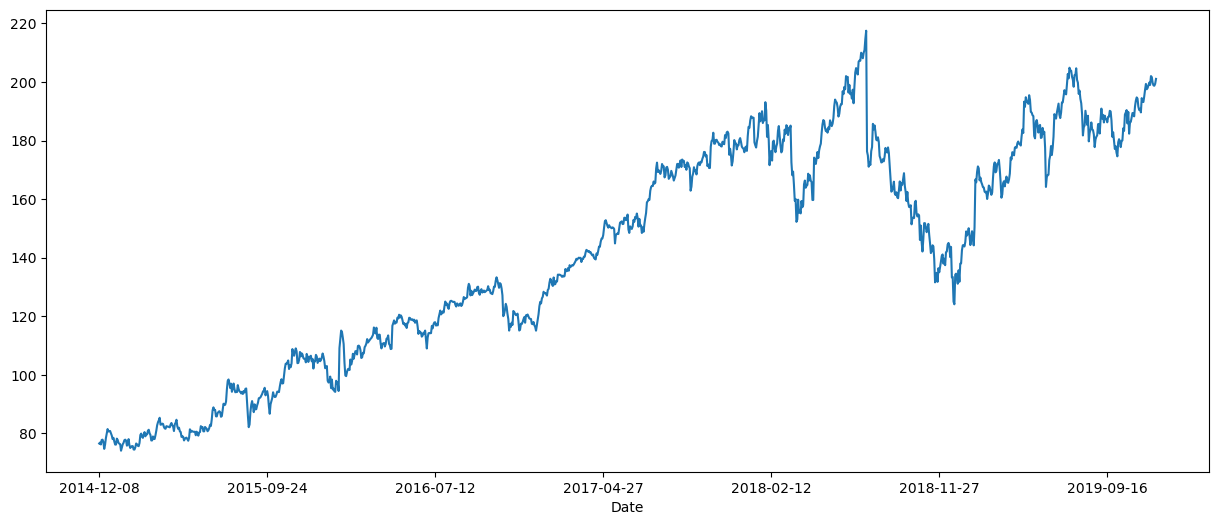

In [33]:
stock_df['Close'].plot(figsize=(15,6));

In [34]:
len(stock_df['Close'])

1259

In [35]:
stock_df['Close'][:600].describe()

count    600.000000
mean     106.499583
std       19.865461
min       74.050003
25%       87.932497
50%      107.840001
75%      121.807497
max      146.559998
Name: Close, dtype: float64

In [36]:
stock_df['Close'][600:].describe()

count    659.000000
mean     173.255326
std       17.356365
min      124.059998
25%      162.514999
50%      175.130005
75%      185.550003
max      217.500000
Name: Close, dtype: float64

Vemos primero ejemplo sin variable exogena

In [37]:
train = stock_df['Close'][0:1240].values
test = stock_df['Close'][1240:].values

In [38]:
len(test)

19

Vamos a probar varios ARIMA, a ver cuál sería la mejor combinación de hiperparámetros.

In [39]:
stepwise_model = auto_arima(train,
                            start_p=1,
                            start_q=1,
                            max_d=3,
                            max_p=5,
                            max_q=5,
                            stationary=False,
                            trace=True,
                           stepwise=True)
print(stepwise_model.aic())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5973.080, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5975.597, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5977.174, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5977.161, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5975.049, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5974.760, Time=0.80 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.95 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5978.841, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5978.892, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5973.656, Time=0.22 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.431 seconds
5973.079582823642


Ya lo tenemos, ahora montaremos el modelo con esos hiperparámetros y vemos que *AIC* tiene.

In [40]:
model = ARIMA(order=(1,1,1))
model.fit(train)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Wed, 06 Mar 2024   AIC                           5973.080
Time:                        10:35:05   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.065      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.019      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.983      0.0

In [41]:
predictions = model.predict(19)
print("mean_squared_error:", mean_absolute_error(test, predictions))

mean_squared_error: 6.237512411383347


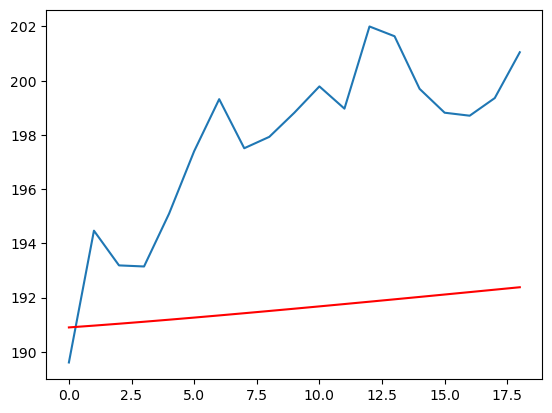

In [42]:
plt.plot(test)
plt.plot(predictions,color='red');

Vamos ahora a compararlo con el mismo modelo, pero en este caso le añadimos una variable exogena al entrenamiento

In [43]:
stock_df[['Open']][:1240].values

array([[ 76.18    ],
       [ 75.199997],
       [ 76.650002],
       ...,
       [194.029999],
       [191.910004],
       [190.      ]])

In [44]:
model = ARIMA(order=(1,1,1))
model.fit(train, exogenous = stock_df['Open'][:1240].values.reshape(-1,1))
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Wed, 06 Mar 2024   AIC                           5973.080
Time:                        10:35:06   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.065      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.019      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.983      0.0

Reduce bastante el *AIC*.

Probemos a entrenar el auto arima con la variable exogena.

In [45]:
model = auto_arima(train,
                   exogenous = stock_df['Open'][:1240].values.reshape(-1,1),
                   start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    stationary=False,
                    trace=True,
                    stepwise=True)

print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5973.080, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5975.597, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5977.174, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5977.161, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5975.049, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5974.760, Time=0.87 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5978.841, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5978.892, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5973.656, Time=0.26 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.442 seconds
5973.079582823642


Probemos varias variables exogenas.

NOTA: para este apartado se utiliza el valor 'Low', que en la vida real no lo tendriamos para realizar la predicción.

In [46]:
model = auto_arima(train,
                   exogenous = stock_df[['Open', 'Low']][:1240].values,
                   start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    stationary=False,
                    trace=True,
                    stepwise=True)

print(model.aic())

print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5973.080, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5975.597, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5977.174, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5977.161, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5975.049, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5974.760, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5978.841, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5978.892, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5973.656, Time=0.23 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.400 seconds
5973.079582823642
5973.079582823642


In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Wed, 06 Mar 2024   AIC                           5973.080
Time:                        10:35:19   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.065      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.019      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.983      0.000      -1.048      -0.753
sigma2         7.2179      0.082     88.324      0.000       7.058       7.378
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):            113669.00
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               4.82   Skew:                            -2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

mean_squared_error: 6.103514310486443


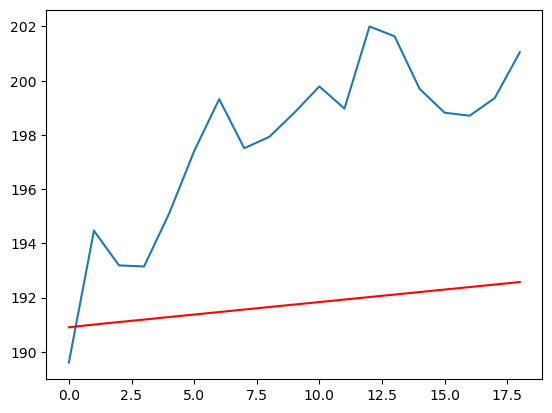

In [48]:
model = ARIMA(order=(3,1,1))
model.fit(train, exogenous = stock_df[['Open', 'Low']][:1240].values)
predictions = model.predict(19 , exogenous = stock_df[['Open', 'Low']][1240:])
print("mean_squared_error:", mean_absolute_error(test, predictions))
plt.plot(test)
plt.plot(predictions,color='red');

## SARIMA
Veamos cómo podemos predecir con datos que tienen estacionalidad, es decir, que cuentan con un patrón que se repite a lo largo del tiempo.

In [49]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
print(len(df))
df.head()

204


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


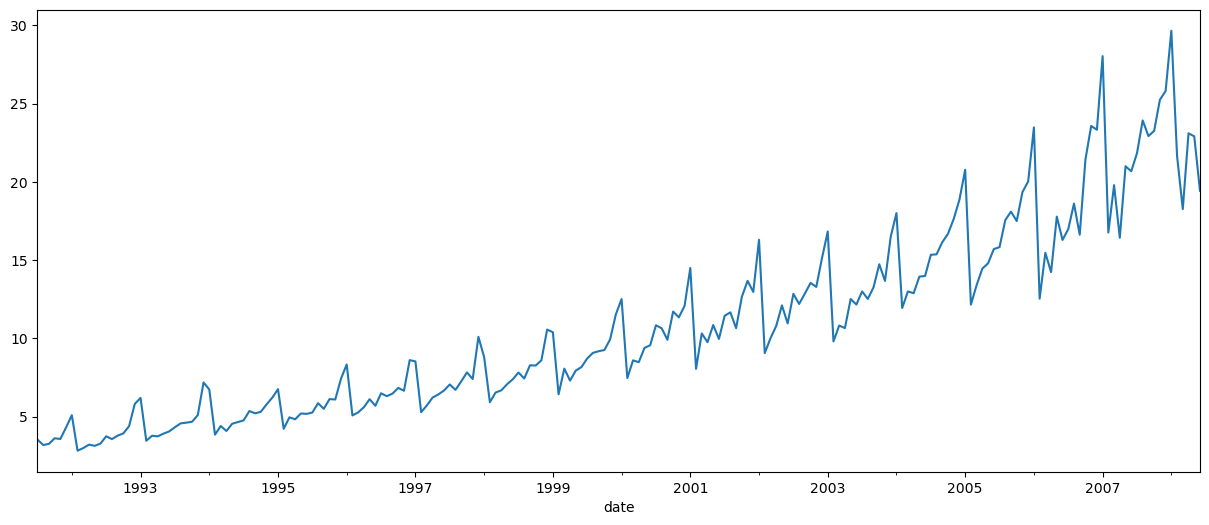

In [50]:
df['value'].plot(figsize=(15,6));

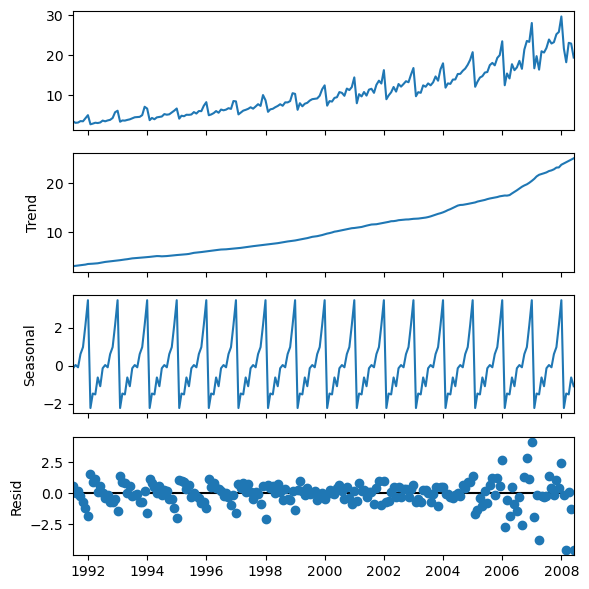

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df[['value']], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_add.plot();

In [52]:
X = df[['value']]
train = X[:-20]
test = X[-20:]

In [53]:
len(test)

20

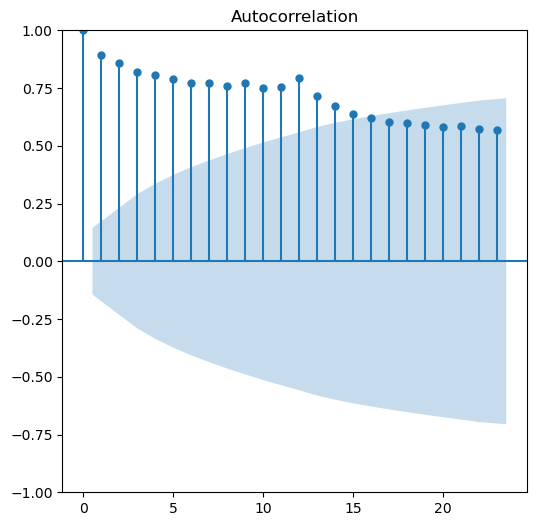

In [54]:
plot_acf(train);

Probemos el auto arima sin indicarle que hay componente de estacionalidad.

In [55]:
model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    trace=True,
                    stepwise=True)

print(model.aic())

predictions = model.predict(20)
print("mean_squared_error:", mean_squared_error(test, predictions))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=698.391, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=764.142, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=739.394, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=708.405, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=762.612, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=700.332, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=700.362, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=699.998, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=736.404, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=695.600, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=697.194, Time=0.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=697.299, Time=0.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=700.821, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=699.306, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=690.7

Ahora le añadimos la componente estacional mediante el parametro `m`.

In [56]:
model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                    trace=True,
                    stepwise=True)

print(model.aic())

predictions = model.predict(20)
print("mean_squared_error:", mean_squared_error(test, predictions))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=359.383, Time=0.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=480.967, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=391.380, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=366.538, Time=0.19 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=357.778, Time=0.18 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=367.053, Time=0.09 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=358.591, Time=0.44 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=361.813, Time=0.14 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=357.470, Time=0.77 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=356.290, Time=0.71 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=354.319, Time=0.56 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=353.117, Time=0.29 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=362.795, Time=0.30 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=378.264, Time=0.22 sec
 ARIMA(2,1,1)(2,1,0)[12]         

In [57]:
predictions

2006-11-01    18.518572
2006-12-01    22.388837
2007-01-01    23.908272
2007-02-01    14.844391
2007-03-01    17.552284
2007-04-01    15.750836
2007-05-01    19.745642
2007-06-01    17.521409
2007-07-01    19.444485
2007-08-01    19.739050
2007-09-01    19.020502
2007-10-01    22.577607
2007-11-01    20.688565
2007-12-01    23.952445
2008-01-01    25.350719
2008-02-01    16.780610
2008-03-01    18.813219
2008-04-01    18.110484
2008-05-01    20.749139
2008-06-01    19.661999
Freq: MS, dtype: float64

In [58]:
test.values


array([[23.575517  ],
       [23.334206  ],
       [28.038383  ],
       [16.763869  ],
       [19.792754  ],
       [16.427305  ],
       [21.000742  ],
       [20.681002  ],
       [21.83489   ],
       [23.93020353],
       [22.93035694],
       [23.26333992],
       [25.25003022],
       [25.80609   ],
       [29.665356  ],
       [21.654285  ],
       [18.264945  ],
       [23.107677  ],
       [22.91251   ],
       [19.43174   ]])

mean_squared_error: 2.705159964971796


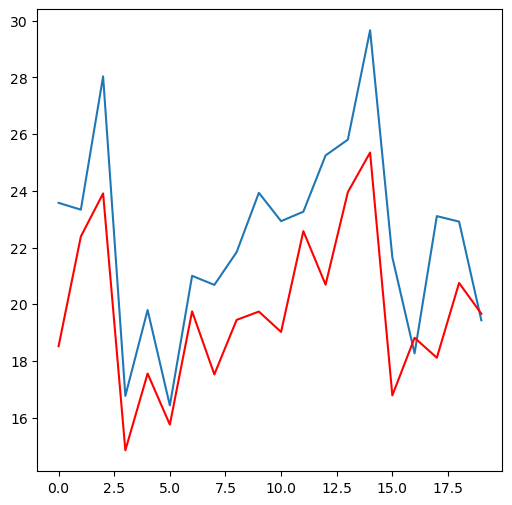

In [59]:
predictions = model.predict(20)
print("mean_squared_error:", mean_absolute_error(test, predictions))
plt.plot(test.values)
plt.plot(predictions.values,color='red');

## Transformar el *dataset* para poder predecir con otros modelos

In [60]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
print(len(df))
df.head()

204


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [61]:
df['value'].shift(1)

date
1991-07-01          NaN
1991-08-01     3.526591
1991-09-01     3.180891
1991-10-01     3.252221
1991-11-01     3.611003
                ...    
2008-02-01    29.665356
2008-03-01    21.654285
2008-04-01    18.264945
2008-05-01    23.107677
2008-06-01    22.912510
Name: value, Length: 204, dtype: float64

In [62]:
for i in range(12,0,-1):
    df['t-'+str(i)] = df['value'].shift(i)

df.dropna(inplace=True)
df

,value,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1992-07-01,3.737851,3.526591,3.180891,3.252221,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523
1992-08-01,3.558776,3.180891,3.252221,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851
1992-09-01,3.777202,3.252221,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776
1992-10-01,3.924490,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202
1992-11-01,4.386531,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202,3.924490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-02-01,21.654285,16.763869,19.792754,16.427305,21.000742,20.681002,21.834890,23.930204,22.930357,23.263340,25.250030,25.806090,29.665356
2008-03-01,18.264945,19.792754,16.427305,21.000742,20.681002,21.834890,23.930204,22.930357,23.263340,25.250030,25.806090,29.665356,21.654285
2008-04-01,23.107677,16.427305,21.000742,20.681002,21.834890,23.930204,22.930357,23.263340,25.250030,25.806090,29.665356,21.654285,18.264945


<Axes: >

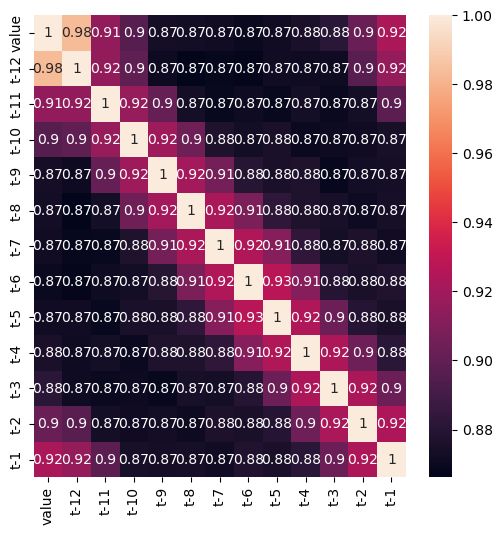

In [63]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [64]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:].values; print(X)
y = df['value'].values; print(y)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state=55)

[[ 3.526591    3.180891    3.252221   ...  3.20478     3.127578
   3.270523  ]
 [ 3.180891    3.252221    3.611003   ...  3.127578    3.270523
   3.73785082]
 [ 3.252221    3.611003    3.565869   ...  3.270523    3.73785082
   3.55877609]
 ...
 [16.427305   21.000742   20.681002   ... 29.665356   21.654285
  18.264945  ]
 [21.000742   20.681002   21.83489    ... 21.654285   18.264945
  23.107677  ]
 [20.681002   21.83489    23.93020353 ... 18.264945   23.107677
  22.91251   ]]
[ 3.73785082  3.55877609  3.77720173  3.92449042  4.38653092  5.81054917
  6.19206769  3.45085699  3.77230686  3.7343029   3.90539892  4.04968714
  4.31556552  4.56218455  4.60866203  4.66785129  5.09384145  7.1799622
  6.73147308  3.84127758  4.39407557  4.07534073  4.5406449   4.64561508
  4.75260653  5.35060467  5.20445484  5.3016513   5.77374216  6.20459348
  6.74948382  4.21606735  4.94934946  4.8230449   5.19475419  5.17078711
  5.25674157  5.85527729  5.49072901  6.11529323  6.08847284  7.41659792
  8.3294

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

rnd_clf = RandomForestRegressor(n_estimators=100, random_state=42)

rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(rnd_clf, mean_absolute_percentage_error(y_test, y_pred))

RandomForestRegressor(random_state=42) 0.04297400406749885
